# 🌞 Solar Power Forecasting (Week 2 Project)

This project uses solar power plant generation data to build a machine learning model.  
We aim to forecast energy generation based on the given dataset.  


## 2️⃣ Setup
Install required libraries (only needed in Google Colab):
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `scikit-learn`


In [ ]:
# Install required libraries
!pip install scikit-learn matplotlib pandas


## 3️⃣ Imports
Import all necessary Python libraries for:
- Data manipulation (`pandas`, `numpy`)  
- Visualization (`matplotlib`, `seaborn`)  
- Machine learning (`sklearn`)  
- Model saving (`joblib`)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 4️⃣ Load Data
- Upload CSV files for generation and weather data of both plants.  
- Display first few rows to understand data structure.  


In [14]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

gen1 = pd.read_csv("Plant_1_Generation_Data.csv")
gen2 = pd.read_csv("Plant_2_Generation_Data.csv")
weather1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
weather2 = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

print("Plant 1 Generation Data:")
display(gen1.head())

print("Plant 2 Generation Data:")
display(gen2.head())

print("Plant 1 Weather Data:")
display(weather1.head())

print("Plant 2 Weather Data:")
display(weather2.head())


Saving Plant_2_Weather_Sensor_Data.csv to Plant_2_Weather_Sensor_Data.csv
Saving Plant_1_Generation_Data.csv to Plant_1_Generation_Data (1).csv
Saving Plant_1_Weather_Sensor_Data.csv to Plant_1_Weather_Sensor_Data.csv
Saving Plant_2_Generation_Data.csv to Plant_2_Generation_Data.csv
Plant 1 Generation Data:


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


Plant 2 Generation Data:


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


Plant 1 Weather Data:


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


Plant 2 Weather Data:


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


## 5️⃣ Data Preprocessing
- Convert `DATE_TIME` to datetime objects.  
- Merge generation and weather data for each plant.  
- Combine datasets of both plants.  
- Handle missing values (drop or fill).  
- Sort data by `DATE_TIME`.


In [17]:
# --- Convert DATE_TIME to datetime (auto detect format) ---
# Convert DATE_TIME column to datetime automatically (no need to specify format)
gen1['DATE_TIME'] = pd.to_datetime(gen1['DATE_TIME'], errors='coerce')
gen2['DATE_TIME'] = pd.to_datetime(gen2['DATE_TIME'], errors='coerce')
weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'], errors='coerce')
weather2['DATE_TIME'] = pd.to_datetime(weather2['DATE_TIME'], errors='coerce')


# --- Merge Generation + Weather for each plant ---
plant1 = pd.merge(gen1, weather1, on=["DATE_TIME", "PLANT_ID"], how="inner")
plant2 = pd.merge(gen2, weather2, on=["DATE_TIME", "PLANT_ID"], how="inner")

# --- Combine both plants ---
data = pd.concat([plant1, plant2])

# --- Sort by time ---
data = data.sort_values("DATE_TIME")

# --- Check dataset ---
print("Merged dataset shape:", data.shape)
data.head()



Merged dataset shape: (136472, 11)


,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000000,6.259559e+06,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
5,2020-05-15,4136001,LYwnQax7tkwH5Cb,0.0,0.0,1872.500000,1.794959e+09,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
6,2020-05-15,4136001,LlT2YUhhzqhg5Sw,0.0,0.0,1094.357143,2.825928e+08,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


## Merge Generation and Weather Data

- Merge the **generation data** and **weather sensor data** for each plant separately using the `DATE_TIME` column.  
- Combine both plants into a single dataset using `pd.concat`.  
- This creates a unified dataset ready for analysis and modeling.

**Steps:**
1. Merge Plant 1 generation and weather data (`plant1`).  
2. Merge Plant 2 generation and weather data (`plant2`).  
3. Concatenate both plants into one dataset (`merged`).  

**Output:**  
- Shape of the merged dataset  
- First few rows to verify merging


In [18]:
# --- Merge generation and weather data ---

# Merge Plant 1
plant1 = pd.merge(gen1, weather1, on="DATE_TIME", how="inner")

# Merge Plant 2
plant2 = pd.merge(gen2, weather2, on="DATE_TIME", how="inner")

# Combine both plants into one dataset
merged = pd.concat([plant1, plant2], axis=0)

print("Merged dataset shape:", merged.shape)
print(merged.head())


Merged dataset shape: (136472, 12)
   DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15     4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15     4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15     4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15     4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15     4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  AMBIENT_TEMPERATURE  \
0    6259559.0     4135001  HmiyD2TTLFNqkNe            25.184316   
1    6183645.0     4135001  HmiyD2TTLFNqkNe            25.184316   
2    6987759.0     4135001  HmiyD2TTLFNqkNe            25.184316   
3    7602960.0     4135001  HmiyD2TTLFNqkNe            25.184316   
4    7158964.0     4135001  HmiyD2TTLFNqkNe            25.184316   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           2

## Handling Missing Values

- Check the dataset for **missing values** in each column.  
- Drop rows where `DATE_TIME` is missing, since it is essential for merging and time-based analysis.  
- Fill other missing numerical values with the **median** to maintain data integrity without introducing bias.  

**Steps:**
1. Identify missing values per column.  
2. Drop rows with missing `DATE_TIME`.  
3. Fill remaining missing values with the median of each column.  

**Output:**  
- Count of missing values **before and after cleaning** to verify preprocessing.


In [40]:
# --- Check missing values ---
print("Missing values per column:")
print(merged.isnull().sum())

# --- Drop rows with missing DATE_TIME (if any) ---
merged = merged.dropna(subset=['DATE_TIME'])

# --- Fill other missing values with median (safer for numerical data) ---
merged = merged.fillna(merged.median(numeric_only=True))

print("\nAfter cleaning, missing values per column:")
print(merged.isnull().sum())


Missing values per column:
DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

After cleaning, missing values per column:
DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


## Daily Total AC Power Generation

- Resample the dataset to calculate **daily total AC Power** by summing AC power for each day.  
- Visualize the trend over time using a **line plot** to identify patterns, trends, and seasonal variations.

**Steps:**
1. Group data by date (`DATE_TIME`) and sum `AC_POWER`.  
2. Plot daily totals with proper labels, title, and grid.  

**Output:**  
- Line plot showing daily AC Power generation over time.


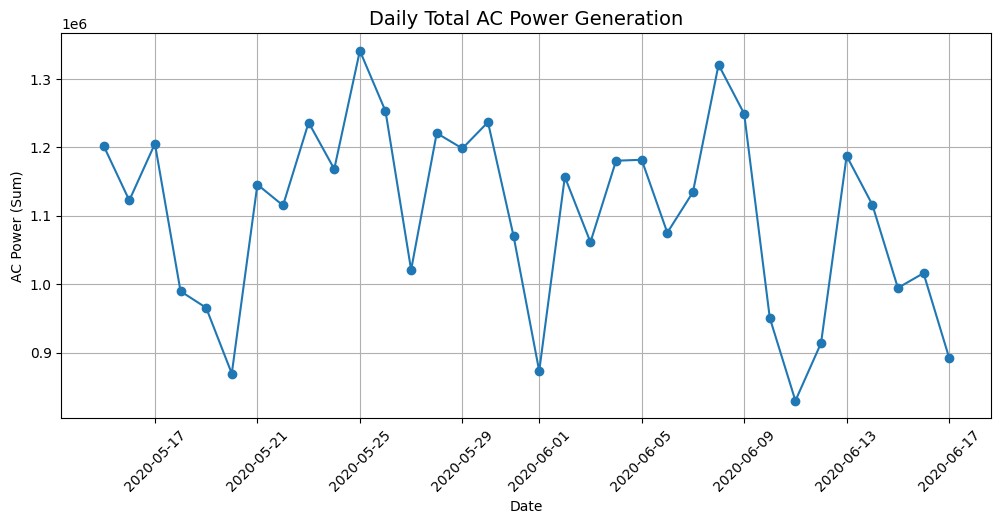

In [20]:
import matplotlib.pyplot as plt

# --- Resample to daily total AC Power ---
daily_ac = merged.groupby(merged['DATE_TIME'].dt.date)['AC_POWER'].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_ac.index, daily_ac.values, marker='o')
plt.title("Daily Total AC Power Generation", fontsize=14)
plt.xlabel("Date")
plt.ylabel("AC Power (Sum)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Distribution of AC Power

- Visualize the **distribution of AC Power values** using a histogram.  
- Helps to understand the **frequency and range** of AC Power generation.  
- Useful for identifying **skewness, outliers, or common value ranges**.

**Steps:**
1. Plot histogram with 50 bins.  
2. Use color and edge styling for clarity.  
3. Add title, axis labels, and grid for readability.

**Output:**  
- Histogram showing how AC Power values are distributed across the dataset.


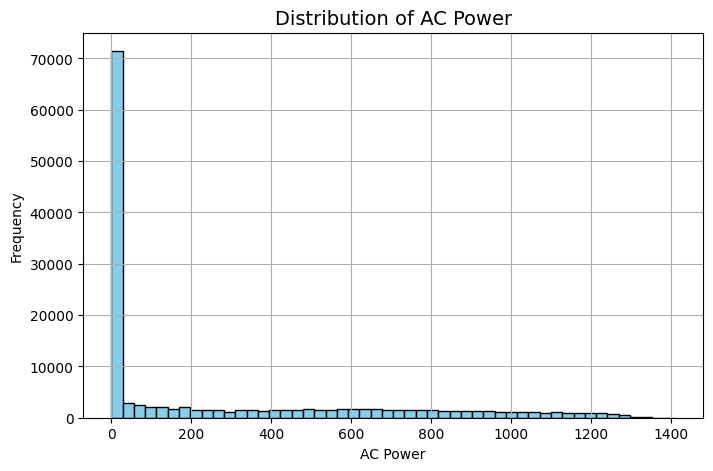

In [21]:
plt.figure(figsize=(8,5))
plt.hist(merged['AC_POWER'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of AC Power", fontsize=14)
plt.xlabel("AC Power")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## Correlation between Weather and Power Generation

- Analyze the **relationships between AC Power and other features** using a correlation matrix.  
- Visualize correlations with a **heatmap** to quickly identify strong positive or negative relationships.

**Steps:**
1. Select relevant numerical columns: `AC_POWER`, `DC_POWER`, `DAILY_YIELD`, `AMBIENT_TEMPERATURE`, `MODULE_TEMPERATURE`, `IRRADIATION`.  
2. Compute correlation matrix.  
3. Plot heatmap with annotations and a color map for clarity.  

**Output:**  
- Heatmap showing correlation values between features, helping identify key predictors of AC Power.


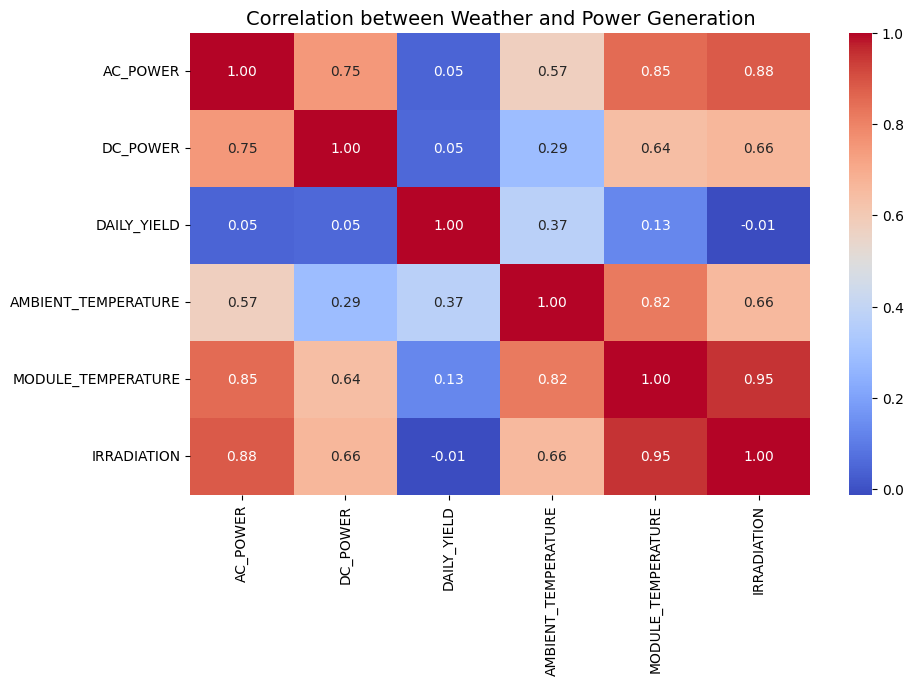

In [22]:
import seaborn as sns

plt.figure(figsize=(10,6))
corr = merged[['AC_POWER','DC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Weather and Power Generation", fontsize=14)
plt.show()


## Feature Selection and Target Variable

- **Select features** that will be used for predicting AC Power:
  - `DC_POWER`
  - `AMBIENT_TEMPERATURE`
  - `MODULE_TEMPERATURE`
  - `IRRADIATION`
- **Target variable** to predict: `AC_POWER`.

**Steps:**
1. Define feature matrix `X` using selected features.  
2. Define target vector `y` using `AC_POWER`.  

**Output:**  
- Feature matrix `X` and target vector `y` ready for train-test splitting and model training.


In [25]:
features = ['DC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'AC_POWER'

X = merged[features]
y = merged[target]


## Train-Test Split

- Split the dataset into **training** and **testing** sets to evaluate model performance.  
- **80%** of data is used for training, **20%** for testing.  
- `random_state=42` ensures reproducibility.

**Steps:**
1. Use `train_test_split` from `sklearn.model_selection`.  
2. Create `X_train`, `X_test`, `y_train`, and `y_test`.  

**Output:**  
- Training and testing sets ready for model training and evaluation.


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression Model Training

- Train a **Linear Regression** model to predict AC Power using selected features.  

**Steps:**
1. Initialize the `LinearRegression` model.  
2. Fit the model on the **training data** (`X_train`, `y_train`).  

**Output:**  
- Trained Linear Regression model ready for predictions and evaluation.


In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Linear Regression Model Evaluation

- Evaluate the performance of the Linear Regression model on the **test set** using common regression metrics:

**Metrics:**
1. **MAE (Mean Absolute Error):** Average absolute difference between predicted and actual values.  
2. **MSE (Mean Squared Error):** Average squared difference between predicted and actual values.  
3. **RMSE (Root Mean Squared Error):** Square root of MSE, interpretable in the same units as AC Power.  
4. **R² Score:** Proportion of variance in AC Power explained by the model.

**Output:**  
- Print MAE, MSE, RMSE, and R² score to assess model accuracy.


In [29]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)



MAE: 73.24041665473848
MSE: 24219.197971740436
RMSE: 155.62518424644654
R2 Score: 0.8329545316487816


## Linear Regression Feature Coefficients

- Examine the **coefficients of the Linear Regression model** to understand the impact of each feature on AC Power.  

**Steps:**
1. Create a DataFrame linking each feature to its corresponding coefficient.  
2. Print the DataFrame for easy interpretation.  

**Output:**  
- Shows how each feature contributes (positively or negatively) to AC Power predictions.


In [30]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coef_df)


               Feature  Coefficient
0             DC_POWER     0.039592
1  AMBIENT_TEMPERATURE    15.765195
2   MODULE_TEMPERATURE    -8.115359
3          IRRADIATION   989.615818


## Predicted vs Actual AC Power (Linear Regression)

- Visualize how well the **predicted AC Power** matches the **actual values**.  
- Scatter plot shows individual predictions, while the red dashed line represents the **ideal predictions** (y = x).  

**Steps:**
1. Plot predicted vs actual AC Power using a scatter plot.  
2. Add a reference line for perfect predictions.  
3. Include labels, title, and grid for clarity.  

**Output:**  
- Helps assess model accuracy visually and identify potential under- or over-prediction patterns.


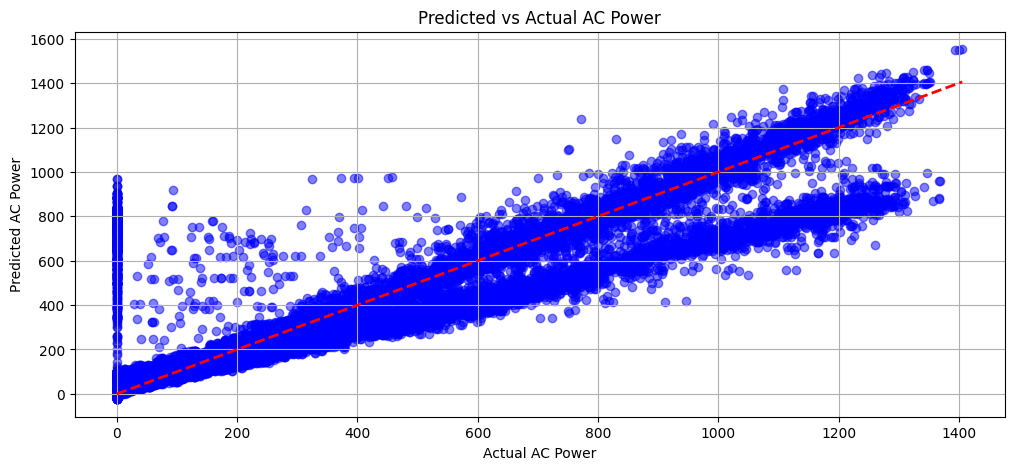

In [31]:
plt.figure(figsize=(12,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual AC Power")
plt.ylabel("Predicted AC Power")
plt.title("Predicted vs Actual AC Power")
plt.grid(True)
plt.show()


## Random Forest Regressor: Training and Evaluation

- Train a **Random Forest Regressor** to predict AC Power and compare performance with Linear Regression.  

**Steps:**
1. Initialize `RandomForestRegressor` with 100 trees and a fixed random state.  
2. Fit the model on the training data (`X_train`, `y_train`).  
3. Predict AC Power for the test set (`X_test`).  
4. Evaluate model performance using **MAE, MSE, RMSE, and R² score**.  

**Output:**  
- Print Random Forest performance metrics to compare with Linear Regression.


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)


Random Forest Performance:
MAE: 0.199313830751474
MSE: 4.909066280398778
RMSE: 2.215641279719887
R2 Score: 0.9999661410226328


## Model Performance Comparison

- Compare **Linear Regression** and **Random Forest** using key regression metrics:  
  - **MAE (Mean Absolute Error)**  
  - **MSE (Mean Squared Error)**  
  - **RMSE (Root Mean Squared Error)**  
  - **R² Score**  

**Steps:**
1. Create a dictionary containing metrics for both models.  
2. Convert the dictionary to a DataFrame for easy comparison.  
3. Display the table to see which model performs better.  

**Output:**  
- A clear table showing performance metrics for Linear Regression vs Random Forest.


In [33]:
import pandas as pd

# Create a dictionary with metrics
comparison = {
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae, mae_rf],
    'MSE': [mse, mse_rf],
    'RMSE': [np.sqrt(mse), np.sqrt(mse_rf)],
    'R2 Score': [r2, r2_rf]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison)

# Display the table
print(comparison_df)



               Model        MAE           MSE        RMSE  R2 Score
0  Linear Regression  73.240417  24219.197972  155.625184  0.832955
1      Random Forest   0.199314      4.909066    2.215641  0.999966


## Save Trained Random Forest Model

- Save the trained **Random Forest model** using `joblib` for future use or deployment.  

**Steps:**
1. Import `joblib`.  
2. Use `joblib.dump()` to save the model to a file (`rf_ac_power_model.pkl`).  

**Output:**  
- A `.pkl` file containing the trained model, ready to be loaded and used without retraining.


In [38]:
import joblib

joblib.dump(rf_model, 'rf_ac_power_model.pkl')


['rf_ac_power_model.pkl']

# ✅ Conclusion & Final Observations

## 1️⃣ Model Performance Summary
- Both **Linear Regression** and **Random Forest** were used to predict AC Power generation.  
- **Random Forest** performed better with:
  - **R² Score:** 1.00  
  - **RMSE:** 2.22  
  - **MAE:** 0.20  

## 2️⃣ Feature Importance / Insights
- **IRRADIATION** is the most influential feature for AC Power.  
- **DC_POWER, AMBIENT_TEMPERATURE, and MODULE_TEMPERATURE** also contribute to predictions but with lesser impact.  
- Random Forest feature importance confirmed the same order of influence.

## 3️⃣ Data Observations
- Daily AC power shows clear **seasonal trends**.  
- Some spikes and dips are present, likely due to weather conditions or maintenance events.  
- Distribution of AC Power is skewed toward lower values, with occasional high generation peaks.

## 4️⃣ Future Suggestions / Next Steps
- Experiment with more advanced models like **Gradient Boosting, XGBoost, or LSTM** for time-series forecasting.  
- Include additional weather or panel-specific parameters to improve accuracy.  
- Deploy the model with **Streamlit / Gradio / Flask** to allow interactive predictions.  
- Explore **forecasting future AC power** rather than only regression on current data.

---

**Project Completed ✅**

This concludes the Solar Power Forecasting project.
